# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

# Data Cleaning

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [4]:
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [5]:
columns_to_drop = ['Unnamed: 2',"Unnamed: 3","Unnamed: 4"]
data.drop(columns_to_drop,inplace=True, axis=1)

In [6]:
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [7]:
def clean_text(text):
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [lemmatizer.lemmatize(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [8]:
data['v2'] = data['v2'].apply(clean_text)

In [9]:
data

v1                                                 v2
0      ham  go jurong point crazy available bugis n great ...
1      ham                            ok lar joking wif u oni
2     spam  free entry wkly comp win fa cup final tkts may...
3      ham                u dun say early hor u c already say
4      ham           nah dont think go usf life around though
...    ...                                                ...
5567  spam  time tried contact u u pound prize claim easy ...
5568   ham                        ì b going esplanade fr home
5569   ham                         pity mood soany suggestion
5570   ham  guy bitching acted like id interested buying s...
5571   ham                                     rofl true name

[5572 rows x 2 columns]

In [10]:
data.columns = ['label','text']

In [11]:
final_data = data

In [12]:
final_data.groupby('label').describe().T

label                         ham  \
text count                   4825   
     unique                  4480   
     top     sorry ill call later   
     freq                      30   

label                                                     spam  
text count                                                 747  
     unique                                                572  
     top     u secret admirer looking make contact ufind rr...  
     freq                                                    8

In [13]:
final_data

label                                               text
0      ham  go jurong point crazy available bugis n great ...
1      ham                            ok lar joking wif u oni
2     spam  free entry wkly comp win fa cup final tkts may...
3      ham                u dun say early hor u c already say
4      ham           nah dont think go usf life around though
...    ...                                                ...
5567  spam  time tried contact u u pound prize claim easy ...
5568   ham                        ì b going esplanade fr home
5569   ham                         pity mood soany suggestion
5570   ham  guy bitching acted like id interested buying s...
5571   ham                                     rofl true name

[5572 rows x 2 columns]

final_data.to_csv('cleaned_data.csv', index=False)

## Data Visualization using word cloud

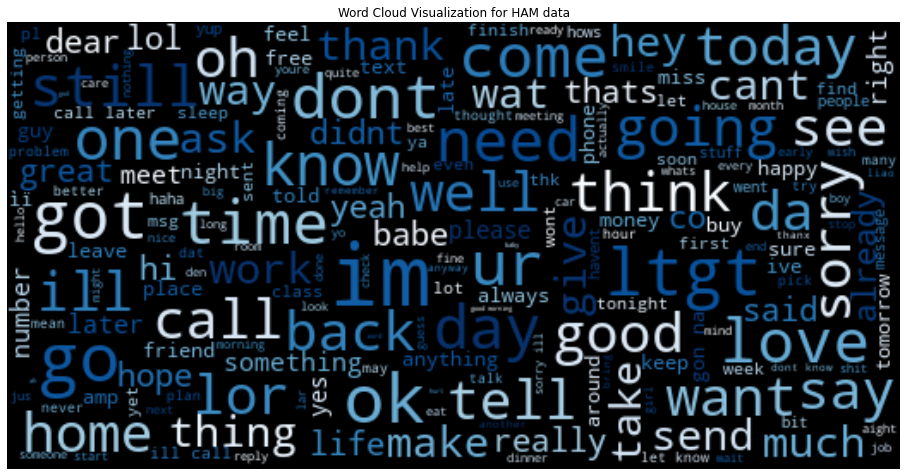

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Get all the ham and spam emails
ham_msg = final_data[final_data.label =='ham']
spam_msg = final_data[final_data.label=='spam']

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.text.to_numpy().tolist())

# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("Word Cloud Visualization for HAM data")
plt.savefig('results/ham_word_cloud.jpg')
plt.show()


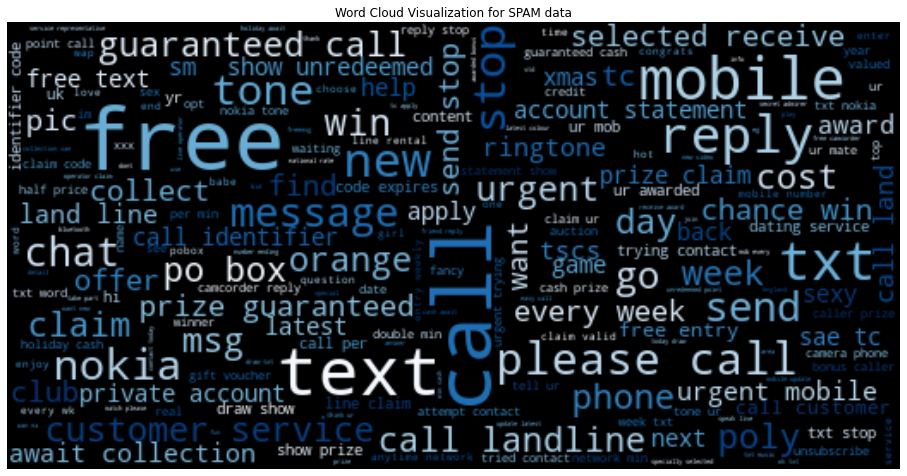

In [15]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("Word Cloud Visualization for SPAM data")
plt.savefig('results/spam_word_cloud.jpg')
plt.show()


In [16]:
X = final_data.loc[:, 'text']
Y = final_data.loc[:, 'label']

X11 X21 X31 Y1
X12 X22 X32 Y2
. .. .. . . .
.... ......
X1(1k) X2 (1k) .. Y (1k)

X1new X2new X3new Ynew


W1X1new + w2X2new + W3X3new + (B)Bias = Ynew  --> (w1,w2,w3)Weights


Weights , Bias (parameter)
Epoch, Batch size, Loss Function , Optimization Algorithm (Hyperparameter)


In [17]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(X,Y, 
                                                    test_size=0.2, random_state = 2)

dy/dx Loss function --- d(Loss Function)/d(weights)
[2]
[2]
[3]
Training set:
Please call me.   ham
You have won a lottery. spam
Call me . You won a lottery.
testing set
Congratulation-[UNK], you won a lottery.

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


max_sequence_length = 38

tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(X_train_data.values)

vocab_length = len(tokenizer.word_index) #len(tok.word_counts) or len(tok.index_word.keys()) will also give same results
print('No. of unique tokens(vocab_size): ', vocab_length)

X_train_sequences = tokenizer.texts_to_sequences(X_train_data.values)
X_test_sequences = tokenizer.texts_to_sequences(X_test_data.values)
print('No of sequences:', len(X_train_sequences)) #No of sequences will be same as the number of training samples
print(X_train_sequences[:2])

#make all sequences of equal length
X_train = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
X_train[:2]

No. of unique tokens(vocab_size):  6650
No of sequences: 4457
[[250, 2051, 159, 966, 14, 384], [2052, 1591, 65]]


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  250,
        2051,  159,  966,   14,  384],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 2052, 1591,   65]], dtype=int32)

In [19]:
import pickle
# saving
with open('models/lstm_tokenizer_imbalanced.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train_labels)
y_test = Encoder.fit_transform(y_test_labels)

In [21]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4457, 38), (4457,), (1115, 38), (1115,))

spam [0]
ham []

In [22]:
from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


model = Sequential()
model.add(Embedding(41, 50, input_length=20))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(50, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(50, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))

In [23]:
def create_model(vocab_len=vocab_length, max_seq_len = max_sequence_length):
    inputs = Input(name='inputs', shape=[max_seq_len])   #None, 150
    layer = Embedding(vocab_length + 1, 50, input_length=max_seq_len)(inputs) #None, 150, 50
    layer = LSTM(64)(layer)  #None, 64
    layer = Dense(256,name='FC1')(layer) #None, 256
    layer = Activation('relu')(layer) #None, 256
    layer = Dropout(0.5)(layer) #None, 256
    layer = Dense(128,name='FC2')(layer) #None, 256
    layer = Activation('relu')(layer) #None, 256
    layer = Dropout(0.5)(layer) #None, 256
    layer = Dense(1,name='out_layer')(layer) #None, 1
    layer = Activation('sigmoid')(layer) #None, 1
    model = Model(inputs=inputs,outputs=layer)
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(), metrics=['acc'])
    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 38)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 38, 50)            332550    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)              

In [24]:
filepath='models/LSTM_spam_model_imbalanced.h5'
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
             ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, verbose=1),
            ]

In [25]:
import time
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 0.3250 - acc: 0.8631
Epoch 00001: val_loss improved from inf to 0.16167, saving model to models/LSTM_spam_model_imbalanced.h5
28/28 [==============================] - 3s 113ms/step - loss: 0.3250 - acc: 0.8631 - val_loss: 0.1617 - val_acc: 0.9709
Epoch 2/20
27/28 [===========================>..] - ETA: 0s - loss: 0.0830 - acc: 0.9800
Epoch 00002: val_loss improved from 0.16167 to 0.06473, saving model to models/LSTM_spam_model_imbalanced.h5
28/28 [==============================] - 1s 38ms/step - loss: 0.0823 - acc: 0.9798 - val_loss: 0.0647 - val_acc: 0.9776
Epoch 3/20
27/28 [===========================>..] - ETA: 0s - loss: 0.0325 - acc: 0.9907
Epoch 00003: val_loss improved from 0.06473 to 0.06066, saving model to models/LSTM_spam_model_imbalanced.h5
28/28 [==============================] - 1s 31ms/step - loss: 0.0320 - acc: 0.9910 - val_loss: 0.0607 - val_acc: 0.9821
Epoch 4/20
27/28 [===========================>..]

In [26]:
training_time

22.770395278930664

In [27]:
history.history

{'loss': [0.324969619512558,
  0.08226573467254639,
  0.031984828412532806,
  0.017250269651412964,
  0.011548834852874279,
  0.007387644611299038,
  0.003436427563428879,
  0.0019090559799224138],
 'acc': [0.8631135821342468,
  0.9798036217689514,
  0.99102383852005,
  0.9957924485206604,
  0.9969144463539124,
  0.9971949458122253,
  0.999439001083374,
  0.999158501625061],
 'val_loss': [0.16166596114635468,
  0.06473366171121597,
  0.06065680831670761,
  0.06843556463718414,
  0.11850900948047638,
  0.0836314782500267,
  0.12020912021398544,
  0.13924716413021088],
 'val_acc': [0.9708520174026489,
  0.9775784611701965,
  0.9820627570152283,
  0.9820627570152283,
  0.963004469871521,
  0.9775784611701965,
  0.9674887657165527,
  0.9686098694801331]}

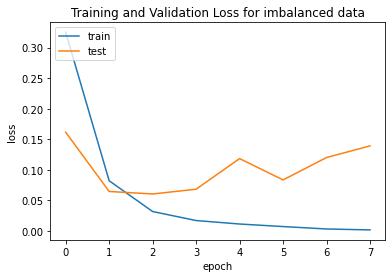

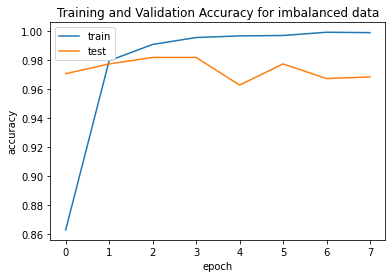

In [28]:
history_dict = history.history

# summarize history for loss
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Training and Validation Loss for imbalanced data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results/training_and_validation_loss_plot_LSTM_imbalanced.jpg')
plt.show()

# summarize history for accuracy
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Training and Validation Accuracy for imbalanced data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results/training_and_validation_accuracy_plot_LSTM_imbalanced.jpg')
plt.show()

In [29]:
loaded_model = load_model('models/LSTM_spam_model_imbalanced.h5')
test_loss, test_acc = accr = loaded_model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(test_loss, test_acc))

35/35 [==============================] - 0s 4ms/step - loss: 0.1009 - acc: 0.9731
Test set
  Loss: 0.101
  Accuracy: 0.973


In [30]:
# make class predictions with the model on new data
y_pred_probability = loaded_model.predict(X_test)

In [31]:
y_pred_probability

array([[7.8853965e-04],
       [1.3526380e-03],
       [2.7617978e-05],
       ...,
       [1.1758238e-01],
       [8.6063743e-03],
       [4.1642785e-04]], dtype=float32)

In [32]:
y_pred = y_pred_probability.tolist()

In [33]:
lstm_predictions = []
for pred in y_pred:
    if pred[0] < 0.5:
        lstm_predictions.append(0)
    else:
        lstm_predictions.append(1)


In [34]:
for i in range(30):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), lstm_predictions[i], y_test[i]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1375, 29, 70, 257, 1773, 1, 271, 18, 174] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3979, 1, 325, 70, 340, 2666, 1, 1, 1, 120, 1572] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 315, 50] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 98, 680, 147, 906] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 83, 5, 227, 5, 1, 5, 217, 5, 2255, 5, 1, 5, 1672, 2, 204, 4271, 1, 117, 987] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2884, 4595, 14, 530, 2, 84, 72, 685, 146, 63, 76, 2, 270, 1, 734] => 0 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 190, 489, 28, 2, 8, 112, 912, 1048, 1474, 1159, 4403, 441,

## Appending LSTM predictions in  result testing data file

In [35]:
test_result_data = pd.read_csv("results/test_result_data_with_SVM_NaiveBayes_imbalanced_data.csv")
test_result_data['LSTM prediction'] = lstm_predictions
test_result_data.to_csv("results/test_result_data_with_SVM_NaiveBayes_LSTM_imbalanced_data.csv")

In [36]:
from sklearn.metrics import  confusion_matrix, classification_report
confusion_matrix(y_test, lstm_predictions)


array([[946,  11],
       [ 19, 139]])

In [37]:
classification_report(y_test,lstm_predictions)


'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       957\n           1       0.93      0.88      0.90       158\n\n    accuracy                           0.97      1115\n   macro avg       0.95      0.93      0.94      1115\nweighted avg       0.97      0.97      0.97      1115\n'

## Visualizing evaluation metrics

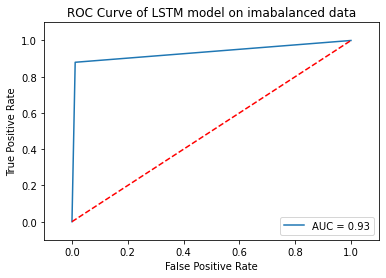

In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, lstm_predictions)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve of LSTM model on imabalanced data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/lstm_roc_imbalanced_data.jpg')
plt.show()


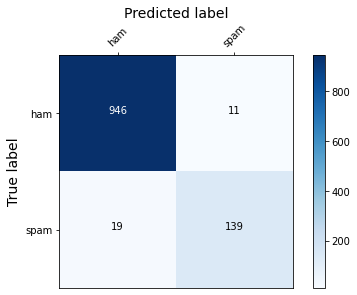

In [39]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,lstm_predictions)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.savefig('results/lstmconfusion_matrix_imbalanced.jpg')
plt.show()
